In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers
print(transformers.__version__)

4.20.0


In [ ]:
from transformers import BertTokenizer, BertModel, pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, RandomSampler, SequentialSampler

import tensorflow as tf
from tensorflow import keras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
financedf = pd.read_csv('data.csv')

In [ ]:
print("Data size \n", financedf.shape )
print()

Data size 
 (5842, 2)



In [ ]:
financedf.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
financedf['Sentence'].duplicated().sum()

520

In [ ]:
financedf.drop_duplicates('Sentence', keep='first')
financedf.shape

(5842, 2)

In [ ]:
financedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [ ]:
print("Positive Tweet Samples: -\n")
for tweet in range(5):
  print(financedf[financedf.Sentiment == 'positive']['Sentence'].iloc[tweet])

Positive Tweet Samples: -

The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .
For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
$SPY wouldn't be surprised to see a green close
Kone 's net sales rose by some 14 % year-on-year in the first nine months of 2008 .
Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 .


In [ ]:
print("Neutral Tweet Samples: -\n")
for tweet in range(5):
  print(financedf[financedf.Sentiment == 'neutral']['Sentence'].iloc[tweet])

Neutral Tweet Samples: -

According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .
The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .
The Stockmann department store will have a total floor space of over 8,000 square metres and Stockmann 's investment in the project will have a price tag of about EUR 12 million .
Viking Line has canceled some services .
Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEMENT 7.2.2007 at 10.30 A total of 56,955 new shares of Ahlstrom Corporation have been subscribed with option rights under the company 's stock option programs I 2001 and II 2001 .


In [ ]:
print("Negative Tweet Samples: -\n")
for tweet in range(5):
  print(financedf[financedf.Sentiment == 'negative']['Sentence'].iloc[tweet])

Negative Tweet Samples: -

$ESI on lows, down $1.50 to $2.50 BK a real possibility
Shell's $70 Billion BG Deal Meets Shareholder Skepticism
SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year .
$SAP Q1 disappoints as #software licenses down. Real problem? #Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5
$AAPL afternoon selloff as usual will be brutal. get ready to lose a ton of money.


neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


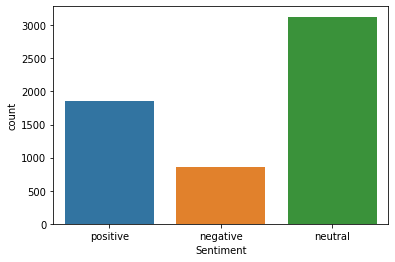

In [ ]:
print(financedf["Sentiment"].value_counts())
sns.countplot(x=financedf.Sentiment);

In [ ]:
labelencoder = LabelEncoder()
financedf['Sentiment'] = labelencoder.fit_transform(financedf['Sentiment'])
#labels

In [ ]:
labelencoder.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
financedf.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
stopWords = set(stopwords.words("english"))

In [ ]:
def preprocess(text):
  text = text.lower()
  text = word_tokenize(str(text))
  text = [re.sub('[^A-Za-z]+', '', word) for word in text]
  #text = re.sub(r'\|\|\|', r' ', text) 
  #text = re.sub(r'http\S+', r'<URL>', text)
  #text = [t for t in text if text.isalpha()]
  text = [t for t in text if t not in stopWords]
  text = [WordNetLemmatizer().lemmatize(t) for t in text]
  text = [PorterStemmer().stem(t) for t in text]
  text = ' '.join(text)

  return text

In [ ]:
#financedf.Sentence = financedf.Sentence.apply(preprocess)

In [ ]:
financedf["Sentence"] = financedf["Sentence"].apply(preprocess)
financedf["Sentence"].head()

0    geosolut technolog leverag benefon gp solut pr...
1                         esi low      bk real possibl
2    last quarter   componenta net sale doubl eurm ...
3    accord finnishrussian chamber commerc  major c...
4    swedish buyout firm sold remain  percent stake...
Name: Sentence, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(financedf["Sentence"], financedf["Sentiment"], test_size=.3)

In [ ]:
y_train

545     1
3605    2
2601    1
5488    1
2527    2
       ..
5723    1
2393    1
3491    1
127     1
4661    2
Name: Sentiment, Length: 4089, dtype: int64

In [ ]:
X_train.head()

545        baltic  merger busi two expect complet earli  
3605    agreement provid switch doubl convert capac  w...
2601    swedish engin consult firm etteplan establish ...
5488            estim annual valu frame agreement eur mn 
2527    finnish outotec award contract suppli new zinc...
Name: Sentence, dtype: object

In [ ]:
trainEncoded = tokenizer(X_train.tolist(), add_special_tokens = True, padding='max_length', truncation=True, max_length=280, 
                                 return_token_type_ids=False, return_tensors = 'pt')
testEncoded = tokenizer(X_test.tolist(), add_special_tokens = True, padding='max_length', truncation=True, max_length=280, 
                                 return_token_type_ids=False, return_tensors = 'pt')

In [ ]:
trainEncoded.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
tokenizer.decode(trainEncoded["input_ids"][3])

'[CLS] estim annual valu frame agreement eur mn [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [ ]:
input_ids_train = trainEncoded['input_ids']
attention_masks_train = trainEncoded["attention_mask"]

input_ids_test = testEncoded['input_ids']
attention_masks_test = testEncoded["attention_mask"]

In [ ]:
trainDataset = TensorDataset(input_ids_train, attention_masks_train, torch.tensor(y_train.values))
testDataset = TensorDataset(input_ids_test, attention_masks_test, torch.tensor(y_test.values))

In [ ]:
len(trainDataset),len(testDataset)

(4089, 1753)

In [ ]:
trainDataloader = DataLoader(trainDataset, sampler=RandomSampler(trainDataset), batch_size=16)
testDataloader = DataLoader(testDataset, sampler=RandomSampler(testDataset), batch_size=32)

In [ ]:
next(iter(trainDataset))

(tensor([  101, 11275,  7660,  3902,  2072,  2048,  5987,  4012, 10814,  2102,
          4656,  2072,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

In [ ]:
class SentimentClassifier(nn.Module):
    def __init__(self,n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.drop = nn.Dropout(p=.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
        self.softmax = nn.Softmax(dim=1)
    def forward(self,input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids,attention_mask=attention_mask,return_dict = False)
        output = self.drop(pooled_output)
        output = self.out(output)
        return self.softmax(output)